In [89]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'  #change dir to your project folder

import numpy as np
X_train = np.load('gdrive/My Drive/dataset1/acc+gyr/trainX.npy')
y_train = np.load('gdrive/My Drive/dataset1/acc+gyr/trainy.npy')
X_test = np.load('gdrive/My Drive/dataset1/acc+gyr/testX.npy')
y_test = np.load('gdrive/My Drive/dataset1/acc+gyr/testy.npy')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Mounted at /content/drive
Mounted at /content/gdrive
(33104, 128, 6) (33104, 118) (3740, 128, 6) (3740, 118)


In [90]:
from numpy import mean
from numpy import std
from numpy import dstack
from numpy import save, load
from pandas import read_csv
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input ,concatenate
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import LSTM, Conv1D, concatenate,GlobalMaxPooling1D,TimeDistributed, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import concatenate
from tensorflow.keras import regularizers

In [91]:
from sklearn.model_selection import train_test_split
X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

In [92]:
model1 = Sequential()
model1.add(LSTM(512, input_shape=(n_timesteps,n_features),return_sequences=True))
model1.add(LSTM(256))
model1.add(Dropout(0.2))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(n_outputs, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()
callbacks = [keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 128, 512)          1062912   
                                                                 
 lstm_32 (LSTM)              (None, 256)               787456    
                                                                 
 dropout_33 (Dropout)        (None, 256)               0         
                                                                 
 dense_48 (Dense)            (None, 128)               32896     
                                                                 
 dense_49 (Dense)            (None, 118)               15222     
                                                                 
Total params: 1,898,486
Trainable params: 1,898,486
Non-trainable params: 0
_________________________________________________________________


In [93]:
history = model1.fit(X_training, y_training, epochs=200, verbose=True, validation_data=(X_validation, y_validation), batch_size=128,callbacks=callbacks)

Epoch 1/200
207/207 [==============================] - 19s 78ms/step - loss: 2.2339 - accuracy: 0.4378 - val_loss: 1.1486 - val_accuracy: 0.6851
Epoch 2/200
207/207 [==============================] - 16s 77ms/step - loss: 0.8276 - accuracy: 0.7766 - val_loss: 0.6465 - val_accuracy: 0.8290
Epoch 3/200
207/207 [==============================] - 16s 78ms/step - loss: 0.5678 - accuracy: 0.8450 - val_loss: 0.4470 - val_accuracy: 0.8775
Epoch 4/200
207/207 [==============================] - 16s 79ms/step - loss: 0.3974 - accuracy: 0.8920 - val_loss: 0.3433 - val_accuracy: 0.9064
Epoch 5/200
207/207 [==============================] - 16s 80ms/step - loss: 0.3382 - accuracy: 0.9062 - val_loss: 0.3433 - val_accuracy: 0.9083
Epoch 6/200
207/207 [==============================] - 16s 78ms/step - loss: 0.2979 - accuracy: 0.9150 - val_loss: 0.2874 - val_accuracy: 0.9236
Epoch 7/200
207/207 [==============================] - 16s 78ms/step - loss: 0.2492 - accuracy: 0.9306 - val_loss: 0.2554 - val_ac

In [96]:
loss, accuracy = model1.evaluate(X_validation, y_validation, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Validation Accuracy:  0.9659
Testing Accuracy: 0.9048


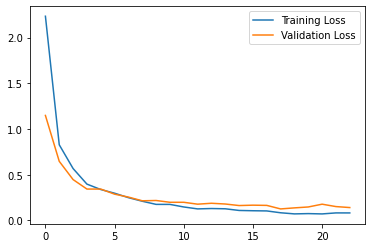

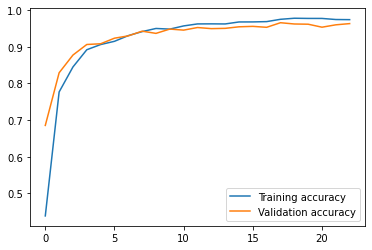

In [97]:
from matplotlib import pyplot as plt
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()
from matplotlib import pyplot as plt
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.legend()
plt.show()